In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
# Load Simulator Backend
backend = Aer.get_backend('statevector_simulator')

# Microsoft Q# Coding Contest - Summer 2018 - Warmup Round June 29 - July 2, 2018

## A. Generate plus state or minus state
You are given a qubit in state $|0⟩$ and an integer sign. <br>
Your task is to convert the given qubit to state $|+⟩ = \frac{1}{\sqrt{2}}( (|0⟩+|1⟩)$ if sign = 1 or $|−⟩ = \frac{1}{\sqrt{2}}((|0⟩−|1⟩)$ if sign = −1. <br>
You have to implement an operation which takes a qubit and an integer as an input and has no output. The ”output” of your solution is the state in which it left the input qubit.

In [2]:
def solution1(circuit, sign):
    if sign == 1:
        circuit.h(0)
    else:
        circuit.x(0)
        circuit.h(0)
    return circuit

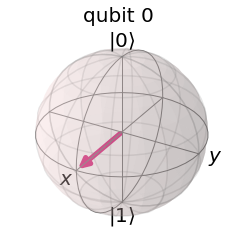

In [3]:
circ = solution1(QuantumCircuit(1), +1)
result = execute(circ, backend).result()
psi = result.get_statevector(circ)
plot_bloch_multivector(psi)

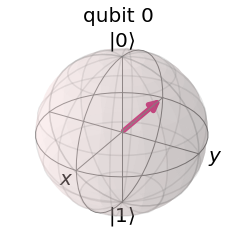

In [4]:
circ = solution1(QuantumCircuit(1), -1)
result = execute(circ, backend).result()
psi = result.get_statevector(circ)
plot_bloch_multivector(psi)

## B. Generate Bell state
You are given two qubits in state $|00⟩$ and an integer index. Your task is to create one of the Bell states on them according to the index: <br>
$$|B_0⟩ = \frac{1}{\sqrt{2}}(|00⟩ + |11⟩)$$
$$|B_1⟩ = \frac{1}{\sqrt{2} }(|00⟩ − |11⟩)$$
$$|B_2⟩ = \frac{1}{\sqrt{2}}(|01⟩ + |10⟩)$$
$$|B_3⟩ = \frac{1}{\sqrt{2}}(|01⟩ − |10⟩)$$ <br>
You have to implement an operation which takes an array of 2 qubits and an integer as an input and has no output. The ”output” of your solution is the state in which it left the input qubits.

In [5]:
def solution2(circuit, index):
    circuit.h(0)
    circuit.cx(0, 1)
    if index == 1:
        circuit.z(1)
    elif index == 2:
        circuit.x(0)
    elif index == 3:
        circuit.x(0)
        circuit.z(1)
    return circuit

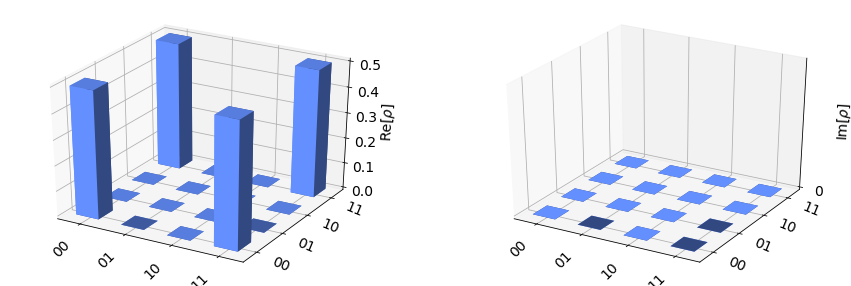

In [6]:
circ = solution2(QuantumCircuit(2), 0)
result = execute(circ, backend).result()
psi = result.get_statevector(circ)
plot_state_city(psi)

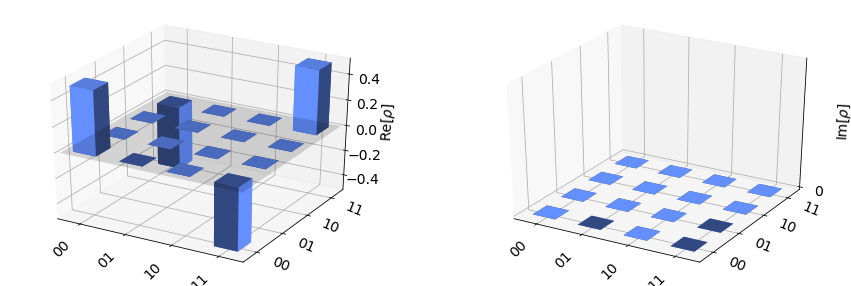

In [7]:
circ = solution2(QuantumCircuit(2), 1)
result = execute(circ, backend).result()
psi = result.get_statevector(circ)
plot_state_city(psi)

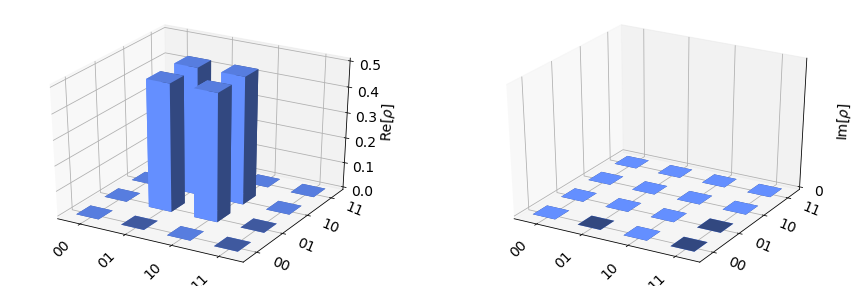

In [8]:
circ = solution2(QuantumCircuit(2), 2)
result = execute(circ, backend).result()
psi = result.get_statevector(circ)
plot_state_city(psi)

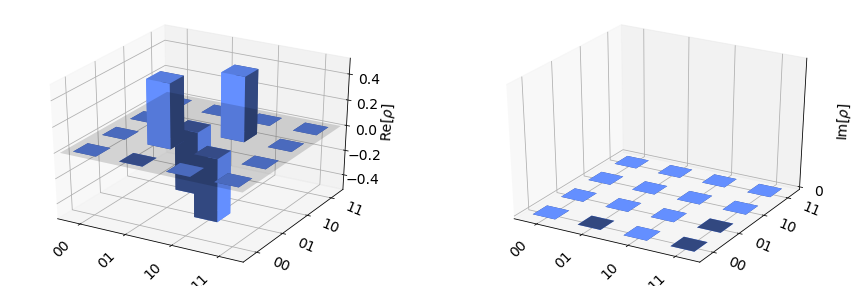

In [9]:
circ = solution2(QuantumCircuit(2), 3)
result = execute(circ, backend).result()
psi = result.get_statevector(circ)
plot_state_city(psi)

## C. Generate GHZ state
You are given $N$ qubits $(1 ≤ N ≤ 8)$ in zero state $|0...0⟩$. Your task is to create Greenberger-Horne-Zeilinger (GHZ) state on them: <br>
$$|\text{GHZ}⟩ = \frac{1}{\sqrt{2}}(|0...0⟩ + |1...1⟩)$$
Note that for $N = 1$ and $N = 2$ GHZ state becomes states $|+⟩$ and $|B_0⟩$ from the previous tasks, respectively.<br>
You have to implement an operation which takes an array of $N$ qubits as an input and has no output. The ”output” of your solution is the state in which it left the input qubits.


In [10]:
def solution3(circuit):
    circuit.h(0)
    for i in range(1, circuit.num_qubits):
        circuit.cx(0, i)
    return circuit

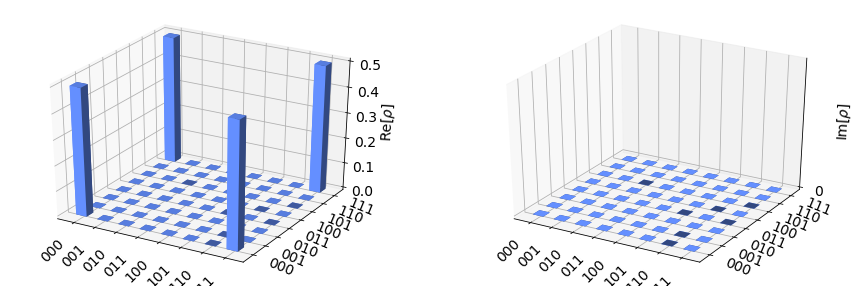

In [11]:
circ = solution3(QuantumCircuit(3))
result = execute(circ, backend).result()
psi = result.get_statevector(circ)
plot_state_city(psi)

## D. Distinguish plus state and minus state
You are given a qubit which is guaranteed to be either in $|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)$ or in $|−⟩ = \frac{1}{\sqrt{2}}(|0⟩ − |1⟩)$ state. <br>
Your task is to perform necessary operations and measurements to figure out which state it was and to return 1 if it was a $|+⟩$ state or -1 if it was $|−⟩$ state. The state of the qubit after the operations does not matter. <br>
You have to implement an operation which takes a qubit as an input and returns an integer.


In [12]:
def solution4(circuit):
    circuit.h(0)
    result = execute(circuit, backend).result()
    count = result.get_counts()
    if '0' in count:
        return +1
    return -1

In [13]:
circ = QuantumCircuit(1)
circ.h(0) # |+⟩
print(solution4(circ))

circ = QuantumCircuit(1)
circ.x(0) # |1⟩
circ.h(0) # |-⟩
print(solution4(circ))

1
-1


## E. Distinguish Bell states
You are given two qubits which are guaranteed to be in one of the Bell states:
<br>
$$|B_0⟩ = \frac{1}{\sqrt{2}}(|00⟩ + |11)$$
$$|B_1⟩ = \frac{1}{\sqrt{2}}(|00⟩ − |11)$$
$$|B_2⟩ = \frac{1}{\sqrt{2}}(|01⟩ + |10⟩)$$
$$|B_3⟩ = \frac{1}{\sqrt{2}}(|01⟩ − |10⟩)$$<br>
Your task is to perform necessary operations and measurements to figure out which state it was and to return the index of that state (0 for $|B_0⟩$, 1 for $|B_1⟩$ etc.). The state of the qubits after the operations does not matter.
You have to implement an operation which takes an array of two qubits as an input and returns an integer.

In [14]:
def solution5(circuit):
    circuit.cx(0, 1)
    circuit.h(0)
    result = execute(circuit, backend).result()
    count = result.get_counts()
    if '00' in count:
        return 0
    elif '01' in count:
        return 1
    elif '10' in count:
        return 2
    return 3

In [15]:
circ = QuantumCircuit(2)
circ.h(0) # |+⟩
circ.cx(0, 1) # |B0⟩
print(solution5(circ))

circ = QuantumCircuit(2)
circ.h(0) # |+⟩
circ.cx(0, 1) # |B0⟩
circ.z(1) # |B1⟩
print(solution5(circ))

circ = QuantumCircuit(2)
circ.h(0) # |+⟩
circ.cx(0, 1) # |B0⟩
circ.x(0) # |B2⟩
print(solution5(circ))

circ = QuantumCircuit(2)
circ.h(0) # |+⟩
circ.cx(0, 1) # |B0⟩
circ.x(0) # |B2⟩
circ.z(1) # |B3⟩
print(solution5(circ))

0
1
2
3


## F. Distinguish multi-qubit basis states
You are given $N$ qubits which are guaranteed to be in one of two basis states on $N$ qubits. You are also given two bitstrings $\text{bits}_0$ and $\text{bits}_1$ which describe these basis states. <br>
Your task is to perform necessary operations and measurements to figure out which state it was and to return 0 if it was the state described with $\text{bits}_0$ or 1 if it was the state described with $\text{bits}_1$. The state of the qubits after the operations does not matter. <br><br>
You have to implement an operation which takes the following inputs: <br><br>
 - an array of qubits qs, <br>
 - two arrays of boolean values $\text{bits}_0$ and $\text{bits}_1$, representing the basis states in which the qubits can be. <br><br>
These arrays will have the same length as the array of qubits. $\text{bits}_0$ and $\text{bits}_1$ will differ in at least one position.<br>
An array of boolean values represents a basis state as follows: the i-th element of the array is true if the i-th qubit is in state $|1⟩$, and false if it is in state $|0⟩$. For example, array [true; false] describes 2-qubit state $|10⟩$.


In [16]:
def solution6(circuit, bits0, bits1):
    for i, (b0, b1) in enumerate(zip(bits0, bits1)):
        if b0 != b1:
            circuit.measure(i, 0)
            result = execute(circuit, backend).result()
            count = result.get_counts()
            if '0' in count:
                return 1 if bits1[i] == '0' else 0
            return 1 if bits1[i] == '1' else 0

In [17]:
circ = QuantumCircuit(8, 1)
circ.x(0)
circ.x(7) # |10000001⟩
solution6(circ, '10001001', '10000001')

1